In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import linalg
%matplotlib inline


def show_gradient_descent(A, b):
    x = np.array([[-2, 2]]).T  
    alpha = 0.02  
    max_iter = 1000
    f = np.linalg.norm(A @ x - b) ** 2  
    points = []  

    print(f'{"k":<4} {"(x1, x2)":>15} {"f(x)":>20}')

    for k in range(max_iter):

        points.append((x[0, 0], x[1, 0], f))

        x_str = f"({x[0,0]:.4f}, {x[1,0]:.4f})"
        print(f'{k:<4} {x_str:>15} {f:>20.8f}')

        grad_f = 2 * A.T @ (A @ x - b)
        x_prev = x.copy()
        x = x - alpha * grad_f

        f_new = np.linalg.norm(A @ x - b) ** 2

        if np.linalg.norm(x - x_prev) < 1e-8:
            break

        f = f_new

    return points





In [2]:
def draw_gradient_descent(A, b, points):
  xx, yy = np.meshgrid(np.arange(-2,2.1,0.1), np.arange(-2,2.1,0.1))
  F1 = A[0][0]*xx + A[0][1]*yy - b[0];
  F2 = A[1][0]*xx + A[1][1]*yy - b[1];
  zz = F1*F1 + F2*F2;
  plt3d = plt.figure().add_subplot(projection='3d')
  plt3d.plot_surface(xx, yy, zz, alpha=0.7, cmap=cm.coolwarm)
    
#  enter your code here (14%)
  x_vals = [p[0] for p in points]
  y_vals = [p[1] for p in points]
  f_vals = [p[2] for p in points]
  
  plt3d.scatter(x_vals, y_vals, f_vals, color='red')

  optimal_x1 = np.array([-2.5, 3.5])  
  optimal_x2 = np.array([-2, 1])
  optimal_F1 = A[0][0]*optimal_x1 + A[0][1]*optimal_x2- b[0]
  optimal_F2 = A[1][0]*optimal_x1 + A[1][1]*optimal_x2- b[1]
  optimal_zz = optimal_F1*optimal_F1 + optimal_F2*optimal_F2
  plt3d.plot(optimal_x1, optimal_x2, optimal_zz, color='blue')

  plt.gca().view_init(elev=20, azim=-100)

  plt.show()

k           (x1, x2)                 f(x)
0    (-2.0000, 2.0000)         113.00000000
1    (-1.4000, 0.8000)          41.00000000
2    (-1.0400, 0.0800)          15.08000000
3    (-0.8240, -0.3520)           5.74880000
4    (-0.6944, -0.6112)           2.38956800
5    (-0.6166, -0.7667)           1.18024448
6    (-0.5700, -0.8600)           0.74488801
7    (-0.5420, -0.9160)           0.58815968
8    (-0.5252, -0.9496)           0.53173749
9    (-0.5151, -0.9698)           0.51142550
10   (-0.5091, -0.9819)           0.50411318
11   (-0.5054, -0.9891)           0.50148074
12   (-0.5033, -0.9935)           0.50053307
13   (-0.5020, -0.9961)           0.50019190
14   (-0.5012, -0.9976)           0.50006909
15   (-0.5007, -0.9986)           0.50002487
16   (-0.5004, -0.9992)           0.50000895
17   (-0.5003, -0.9995)           0.50000322
18   (-0.5002, -0.9997)           0.50000116
19   (-0.5001, -0.9998)           0.50000042
20   (-0.5001, -0.9999)           0.50000015
21   (-0.5000, -

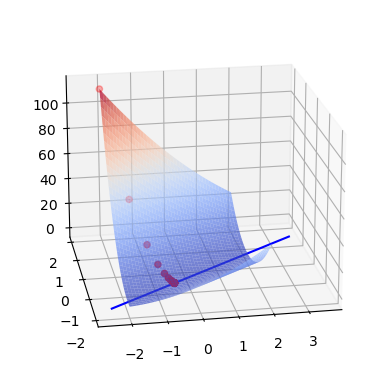

In [3]:
if __name__ == '__main__':
  b = np.array([[1], [2]])
  A = np.array([[1, -2], [1, -2]])
  points = show_gradient_descent(A, b)
  draw_gradient_descent(A, b, points)

In [4]:
# Try different learning rates of alpha. How to adjust the learning rate for faster speed of convergence? (4%)
# 如何調整 alpha 使得所需迴圈次數愈少愈好(即較快達到收斂)？
# Write down your answer here. 

Ans: 在此範例中（即 $A = \begin{bmatrix}1&-2\\1&-2\\\end{bmatrix}$ ，$b = \begin{bmatrix}1\\2\end{bmatrix}$）, 若 $x$ 以 (-2,2) 為起點，那麼將 alpha 的值設為 0.05 的時候，會最快達到收斂，只會跑兩次迭代，也就是說只更新一次就會達到最佳解。

In [5]:
# Try different initial points of x. Do different initial points give rise to different to optimal solutions? (4%)
# 不同初始點 x 會使演算法找到不同最佳解嗎?
# Write down your answer here.

Ans: 會，因為在解 $A^TAx = A^Tb$ 時為無限多組解，因此不同初始點 x 經由梯度下降可能會找到不同的最佳解。

In [6]:
# Does the minimum vary with the values of the initial point? (4%)
# 不同初始點 x 會使演算法找到不同最小值嗎?
# Write down your answer here. 

Ans: 不會，在本次問題中，沒有 local minimum，最小值皆為 0.5 , 因此不同的初始點 $x$ 都會找到一樣的最小值。

In [7]:
# Is the minimum a local minimum or a global minimum? (4%)
# # Write down your answer here. 

Ans: 是 global minimum